In [1]:
%cd /content/drive/My Drive/Deep Learning/Covid19

/content/drive/My Drive/Deep Learning/Covid19


In [2]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/face-mask-detection/face-mask-detector.zip

--2020-05-25 03:27:47--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/face-mask-detection/face-mask-detector.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.248.232
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.248.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74053680 (71M) [application/zip]
Saving to: ‘face-mask-detector.zip’

face-mask-detector. 100%[===================>]  70.62M  13.7MB/s    in 6.2s    

2020-05-25 03:27:54 (11.4 MB/s) - ‘face-mask-detector.zip’ saved [74053680/74053680]



In [3]:
!unzip face-mask-detector.zip

Archive:  face-mask-detector.zip
   creating: face-mask-detector/
   creating: face-mask-detector/dataset/
   creating: face-mask-detector/dataset/with_mask/
  inflating: face-mask-detector/dataset/with_mask/0-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/1-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/10-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/100-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/101-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/103-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/104-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/105-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/106-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/107-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/108-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/109-with-mask.jpg  
  infla

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import argparse
from imutils import paths
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, AveragePooling2D, Flatten, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [8]:
%cd face-mask-detector

/content/drive/My Drive/Deep Learning/Covid19/face-mask-detector


In [0]:
#hyperparams
LR = 0.0001
EPOCHS = 20
BS = 32

In [19]:
print("[INFO] loading images...")
filename = 'dataset'
imagePaths = list(paths.list_images(filename))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


In [21]:
data

array([[[[-0.5529412 , -0.5058824 , -0.7254902 ],
         [-0.6392157 , -0.5764706 , -0.7647059 ],
         [-0.654902  , -0.58431375, -0.7490196 ],
         ...,
         [-0.6784314 , -0.654902  , -0.8039216 ],
         [-0.75686276, -0.7254902 , -0.9372549 ],
         [-0.7176471 , -0.6784314 , -0.85882354]],

        [[-0.6       , -0.5529412 , -0.75686276],
         [-0.64705884, -0.58431375, -0.77254903],
         [-0.6392157 , -0.5686275 , -0.73333335],
         ...,
         [-0.49019605, -0.4588235 , -0.5764706 ],
         [-0.8039216 , -0.7647059 , -0.94509804],
         [-0.70980394, -0.64705884, -0.827451  ]],

        [[-0.62352943, -0.5764706 , -0.78039217],
         [-0.6392157 , -0.5764706 , -0.7647059 ],
         [-0.62352943, -0.5529412 , -0.7176471 ],
         ...,
         [-0.6       , -0.5529412 , -0.6627451 ],
         [-0.827451  , -0.7647059 , -0.94509804],
         [-0.7019608 , -0.6313726 , -0.78039217]],

        ...,

        [[-0.5294118 , -0.4352941 , -0

In [0]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

(x_train, x_test, y_train, y_test) = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

aug = ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.2,
                         height_shift_range=0.2, 
                         shear_range=0.15,
                         zoom_range=0.15,
                         fill_mode='nearest',
                         horizontal_flip=True)

In [24]:
labels[:30]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# **Fine Tuning**

In [28]:
baseModel = MobileNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=Input(shape=(224, 224, 3)))

head_model = baseModel.output
head_model = AveragePooling2D(pool_size=(7,7))(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(128, activation='relu')(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(2, activation='softmax')(head_model)


model = Model(inputs=baseModel.input, outputs=head_model)
for layer in baseModel.layers:
    layer.trainable = False

In [29]:
opt = Adam(lr=LR, decay = LR/EPOCHS)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

H = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch = len(x_train)//BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test)//BS,
    epochs=EPOCHS
)

Epoch 1/20
34/34 [==============================] - 11s 319ms/step - loss: 0.4409 - accuracy: 0.7959 - val_loss: 0.1048 - val_accuracy: 0.9855
Epoch 2/20
34/34 [==============================] - 10s 297ms/step - loss: 0.1199 - accuracy: 0.9635 - val_loss: 0.0496 - val_accuracy: 0.9855
Epoch 3/20
34/34 [==============================] - 10s 295ms/step - loss: 0.0608 - accuracy: 0.9850 - val_loss: 0.0340 - val_accuracy: 0.9928
Epoch 4/20
34/34 [==============================] - 10s 296ms/step - loss: 0.0438 - accuracy: 0.9897 - val_loss: 0.0259 - val_accuracy: 0.9964
Epoch 5/20
34/34 [==============================] - 10s 293ms/step - loss: 0.0515 - accuracy: 0.9860 - val_loss: 0.0212 - val_accuracy: 0.9964
Epoch 6/20
34/34 [==============================] - 10s 295ms/step - loss: 0.0356 - accuracy: 0.9916 - val_loss: 0.0181 - val_accuracy: 0.9964
Epoch 7/20
34/34 [==============================] - 10s 303ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0156 - val_accuracy: 1.0000

In [32]:
'''predict_model = model.predict(x_test, batch_size=BS)
predict_model = np.argmax(predict_model, axis=1)
print(classification_report(x_test.argmax(axis=1), predict_model,
                            target_names=lb.classes_))
print("Saving model")
model.save("face_detect.h5")
'''

print("[INFO] evaluating network...")
predIdxs = model.predict(x_test, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(y_test.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

print("[INFO] saving mask detector model...")
model.save("face_detect.h5", save_format="h5")

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       138
without_mask       1.00      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

[INFO] saving mask detector model...


In [31]:
lb.classes_

array(['with_mask', 'without_mask'], dtype='<U12')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'middle right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


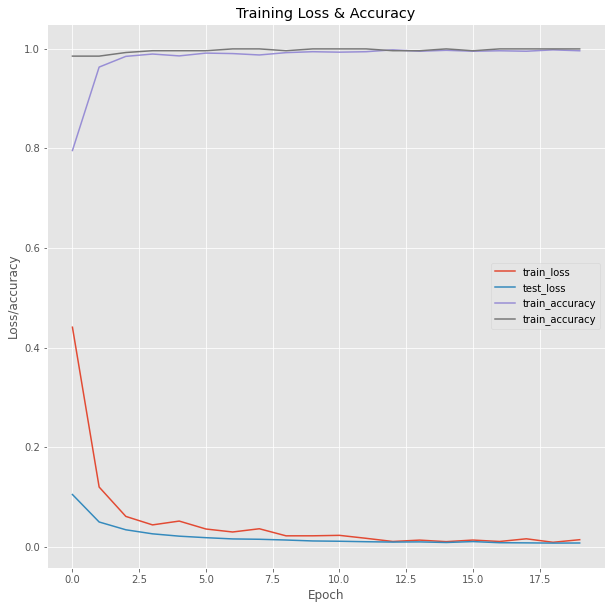

In [37]:
plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="train_accuracy")
plt.title("Training Loss & Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/accuracy")
plt.legend(loc="middle right")
plt.savefig("plot.png")